In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import load_img, img_to_array

import os
import numpy as np
import matplotlib.pyplot as plt


2025-12-05 20:40:05.087999: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-05 20:40:05.088240: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-05 20:40:05.115156: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-05 20:40:08.220299: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

In [2]:
%matplotlib inline


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Нормализация (приводим значения пикселей к диапазону 0..1)
x_train = x_train / 255.0
x_test = x_test / 255.0

print(f"Размер обучающей выборки: {x_train.shape}")
print(f"Размер тестовой выборки: {x_test.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Размер обучающей выборки: (60000, 28, 28)
Размер тестовой выборки: (10000, 28, 28)


In [4]:
model = Sequential(
    [
        Flatten(input_shape=(28, 28)),
        Dense(128, activation="relu"),
        Dropout(0.2),
        Dense(10, activation="softmax"),
    ]
)

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

model.summary()


/home/pavel/Projects/detectnum/.venv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
E0000 00:00:1764956411.954949   18982 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1764956411.959995   18982 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Обучаем 10 эпох, 10% данных отщипываем для валидации
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9109 - loss: 0.3078 - val_accuracy: 0.9677 - val_loss: 0.1230
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9559 - loss: 0.1495 - val_accuracy: 0.9747 - val_loss: 0.0858
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9665 - loss: 0.1115 - val_accuracy: 0.9778 - val_loss: 0.0755
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9718 - loss: 0.0914 - val_accuracy: 0.9805 - val_loss: 0.0688
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9758 - loss: 0.0778 - val_accuracy: 0.9805 - val_loss: 0.0685
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9789 - loss: 0.0672 - val_accuracy: 0.9785 - val_loss: 0.0716
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9813 - loss: 0.0575 - val_accuracy: 0.9828 - val_loss: 0.0658
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9829 - loss: 0.0529 - 

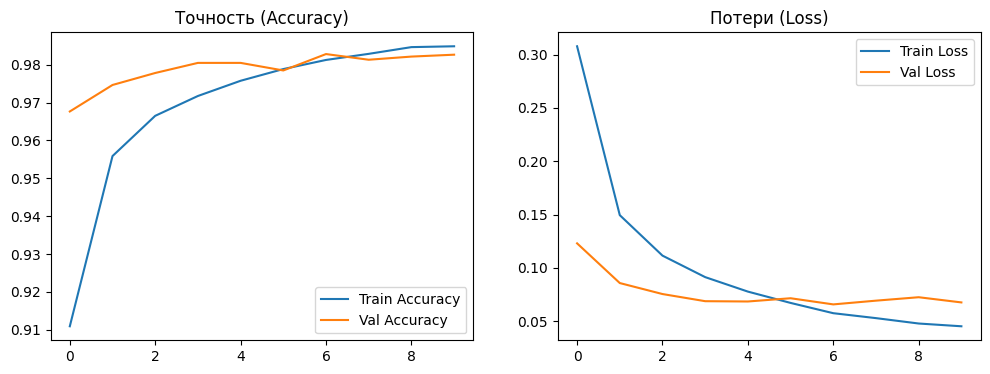

In [6]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Train Accuracy")
plt.plot(epochs_range, val_acc, label="Val Accuracy")
plt.legend(loc="lower right")
plt.title("Точность (Accuracy)")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Train Loss")
plt.plot(epochs_range, val_loss, label="Val Loss")
plt.legend(loc="upper right")
plt.title("Потери (Loss)")

plt.show()


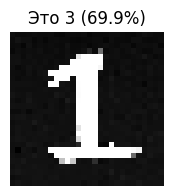

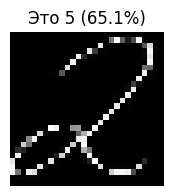

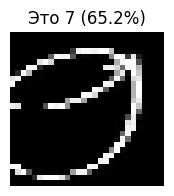

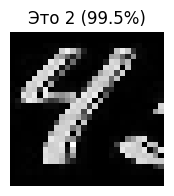

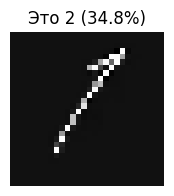

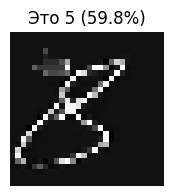

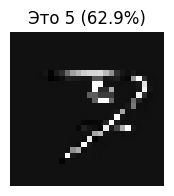

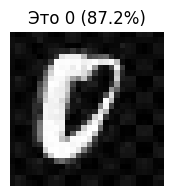

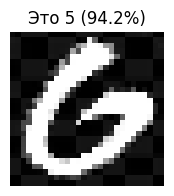

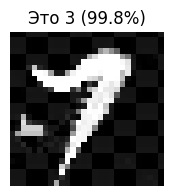

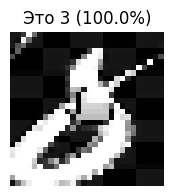

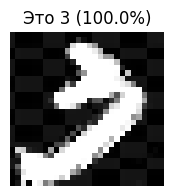

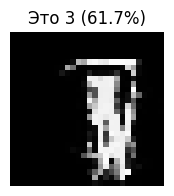

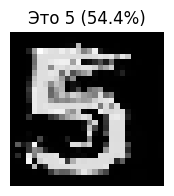

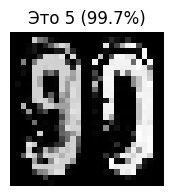

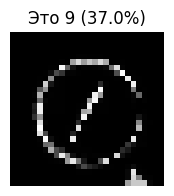

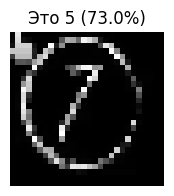

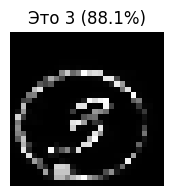

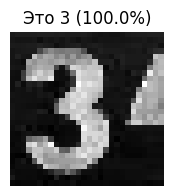

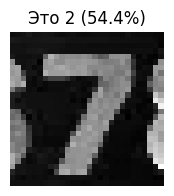

In [ ]:
folder_path = "../attachments"

if os.path.exists(folder_path):
    files = [
        f
        for f in os.listdir(folder_path)
        if f.lower().endswith((".png", ".jpg", ".jpeg"))
    ]

    if not files:
        print("В папке attachments нет картинок.")

    for filename in files:
        path = os.path.join(folder_path, filename)
        img = load_img(path, color_mode="grayscale", target_size=(28, 28))
        img_array = img_to_array(img)

        # Если средняя яркость > 100, считаем, что фон белый
        if np.mean(img_array) > 100:
            img_array = 255.0 - img_array

        model_input = img_array / 255.0
        model_input = np.expand_dims(model_input, axis=0)

        prediction = model.predict(model_input, verbose=0)
        predicted_digit = np.argmax(prediction)
        confidence = np.max(prediction) * 100

        plt.figure(figsize=(2, 2))
        plt.imshow(img_array.reshape(28, 28), cmap="gray")
        plt.title(f"Это {predicted_digit} ({confidence:.1f}%)")
        plt.axis("off")
        plt.show()

else:
    print(f"Папка {folder_path} не найдена. Проверь структуру проекта.")
